<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_lesson_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация. Метод K-средних

Давайте рассмотрим пример. Специально не будем пользоваться библиотекой
Sklearn, и сделаем все с помощью библиотеки NumPy, то есть фактически вручную.
Напомню, процесс обучения алгоритма K-средних является итеративным, то есть
циклическим. Первый цикл состоит из следующих шагов:

1 шаг: алгоритм случайным образом создает k центров будущих кластеров.

2 шаг: алгоритм относит каждую точку данных к ближайшему центроиду, формируя
k кластеров.

3 шаг: для каждого кластера алгоритм вычисляет новый центр, как среднее
значение всех точек в этом кластере.

4 шаг: поскольку положение центроидов изменилось, алгоритм заново относит
каждую точку данных уже к новым ближайшим центроидам

После этого первая итерация алгоритма завершается. Затем шаги со второго по
четвертый повторяются до тех пор, пока на какой-либо итерации, на четвертом
шаге, все точки будут отнесены к тем же центроидам, что и на предыдущем шаге.
После этого можно считать, что алгоритм обучения сошелся. Теперь давайте
разберемся с кодом.

Импортируем необходимы библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from scipy.spatial.distance import cdist

Загрузим датасет и посмотрим на первые пять
строчек этого датасета. Используем только первые 10 строк данных, а затем
протестируем на всем датасете.

In [ ]:
df = pd.read_csv('Mall_Customers (1).csv')
df = df.drop(["CustomerID"], axis=1)
df = df.drop(["Genre"], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Отобразим все точки датасета на графике и покрасим их в соответствии со
столбцом Spending Score (1-100).

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

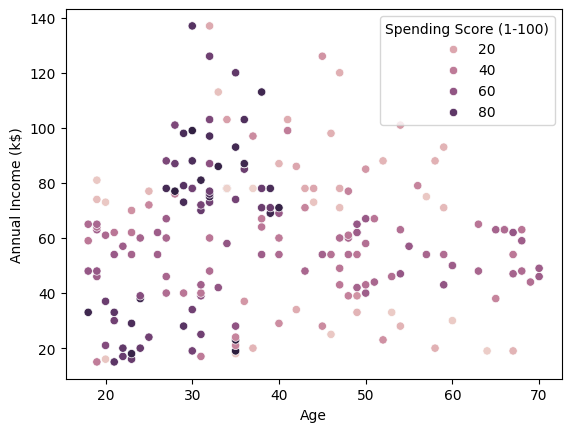

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

Давайте теперь возьмем первые десять записей
из датасета и сначала перейдем к написанию алгоритма к этим данным, а потом ко всем данным.

In [ ]:
x = df.iloc[:10, :2]
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


Первый шаг алгоритма — создать k центроидов. Центроиды не обязательно должны
быть частью датасета, но мы возьмем k случайных точек из датасета за центроиды.
K - параметр алгоритма, пусть он будет равен четырем. То есть разделим датасет на 4 кластера.

In [ ]:
k = 4

Далее мы будем работать с массивом NumPy. Давайте преобразуем датафрем в
массив.

In [ ]:
x = x.values

Теперь возьмем из массива k случайных точек, и сделаем их центроидами. Важно
зафиксировать randomseed чтобы наши результаты совпадали.

In [ ]:
np.random.seed(1)
idx = np.random.choice(x.shape[0], k, replace=False)
centroids = x[idx, :]

In [ ]:
centroids

array([[20, 16],
       [30, 19],
       [35, 18],
       [31, 17]])

Определили центроиды, теперь нужно отнести каждую точку датасета к ближайшей
центроиде. Для этого, мы сначала для каждой точки посчитаем расстояние до всех
центроидов, а затем выберем ближайшую. Для быстрого расчета используем
функцию cdist из библиотеки scipy. Алгоритм k средних использует Евклидово
расстояние, как меру расстояния между точками

In [ ]:
distances = cdist(x, centroids, 'euclidean')
distances

array([[ 1.41421356, 11.70469991, 16.2788206 , 12.16552506],
       [ 1.41421356,  9.8488578 , 14.31782106, 10.19803903],
       [ 0.        , 10.44030651, 15.13274595, 11.04536102],
       [ 3.        ,  7.61577311, 12.16552506,  8.06225775],
       [11.04536102,  2.23606798,  4.12310563,  0.        ],
       [ 2.23606798,  8.24621125, 13.03840481,  9.        ],
       [15.13274595,  5.09901951,  0.        ,  4.12310563],
       [ 3.60555128,  7.07106781, 12.        ,  8.06225775],
       [44.10215414, 34.        , 29.01723626, 33.06055051],
       [10.44030651,  0.        ,  5.09901951,  2.23606798]])

У нас появилась матрица 10 на 4, где строки соответствуют точкам датасета, а
столбцы — центроидам. Значение в ячейках соответствует расстоянию от
соответствующей точки до соответствующей центроиды. Там где вы видите ноль —
эти точки соответствуют центроидам, и расстояние от центроида до нее очевидно
равно нулю, потому что это одно и тоже.

Теперь нужно определить расстояние от точки до каждого центроида. По факту, для
каждой строки нужно определить номер столбца, расстояние до которого
минимально.

Перенесем эту логику в код.

In [ ]:
points = distances.argmin(1)

Единица в скобках значит, что мы ищем индекс столбца с минимальным значением
для каждой строки.
Посмотрим что содержится в points.

In [ ]:
points

array([0, 0, 0, 0, 3, 0, 2, 0, 2, 1])

Массив из 10 значений, каждое соответствует индексу ближайшей центроиды к
соответствующей точке.

Теперь давайте пересчитаем новые координаты центроидов.

In [ ]:
new_centroids = []
for i in range(k):
  pts = x[points == i]
  new_centroids.append(pts.mean(axis=0)) # с помощью параметра axis мы можем указать по строкам или столбцам мы будем считать среднее. 0 - по строкам, 1 - по столбцам
new_centroids

[array([21.33333333, 16.16666667]),
 array([30., 19.]),
 array([49.5, 18.5]),
 array([31., 17.])]

Мы получили новые координаты центроид, давайте преобразуем их к массиву
numpy. С помощью метода vstack мы можем преобразовать три одномерных
массива в один двумерный. Так удобнее работать с ними.

In [ ]:
new_centroids = np.vstack(new_centroids)

Теперь нам нужно повторять пересчет до тех пор, пока алгоритм не сойдется.
Критериев сходимости может быть несколько. Мы можем остановить алгоритм,
если на каком то шаге все точки будут назначены тем же центроидам, что и на
предыдущем шаге. Минус такого способа в том, что он требует большое количество
памяти.

Можем пойти другим путем. Будем запоминать не значение меток кластеров на
текущем и предыдущем шаге, а координаты центроидов, и останавливать алгоритм,
когда изменение координат всех центроидов незначительно. Как правило,
количество центроидов намного меньше, чем количество точек, поэтому такой
способ потребует гораздо меньше памяти. Пойдем этим путем. Перенесем расчет
центроид в цикл. В качестве критерия остановки используем флажок.

In [ ]:
tol = 0.1
stop_criteria = False

while not stop_criteria:
  distances = cdist(x, centroids, 'euclidean')
  points = distances.argmin(1)

  new_centroids = []
  for i in range(k):
    pts = x[points == i]
    new_centroids.append(pts.mean(axis=0))
  old_centroids = centroids.copy()
  centroids = np.vstack(new_centroids)
  stop_criteria = (np.abs(old_centroids - centroids) > tol).sum() == 0

points

array([0, 0, 0, 0, 3, 0, 3, 0, 2, 1])

Нужно сравнить новые значения центроидов с предыдущими, чтобы проверить,
значительно ли изменение координат. Для определения значительности обычно
используют параметр tol(толеранс), который содержит минимальное значительное
изменения расстояния. Все изменения, которые меньше этого параметра, будут
незначительными(первая строка). Так же сохраним координаты старых центроидов,
и переименуем новые координаты центроидов. И посчитаем изменения в
координатах центроидов. Для этого отнимем от старых значений новые, и возьмем
значения по модулю.

Далее мы заканчиваем рассматривать метод к средних. Теперь создадим функцию
и поместим туда метод fit. Алгоритм будет иметь два параметра - k и tol.

In [ ]:
class MyKMeans(object):
  def __init__(self, k, tol=0.1):
    self.k = k
    self.tol = tol
    self.centroids = None

  def fit(self, x):
    idx = np.random.choice(x.shape[0], self.k, replace=False)
    centroids = x[idx, :]
    stop_criteria = False

    while not stop_criteria:
      distances = cdist(x, centroids, 'euclidean')
      points = distances.argmin(1)
      new_centroids = []

      for i in range(self.k):
        pts = x[points == i]
        new_centroids.append(pts.mean(axis=0))

      old_centroids = centroids.copy()
      centroids = np.vstack(new_centroids)
      stop_criteria = (np.abs(old_centroids - centroids) > self.tol).sum() == 0
# Далее для предсказаний нам нужно сохранить координаты центроид. Тогда, после
# обучения этого алгоритма, мы сможем запускать его на любых данных
    self.centroids = centroids
    return self
# В методе predict нам просто нужно определить ближайшую центроиду для каждой точки.
  def predict(self, x):
    distances = cdist(x, self.centroids, 'euclidean')
    points = distances.argmin(1)
    return points

Запустим алгоритм на всем датасете

In [ ]:
x = df.iloc[:, :2].values
km = MyKMeans(k=4).fit(x)
point = km.predict(x)

И выведем точки, окрашенные в результате алгоритма кластеризации.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

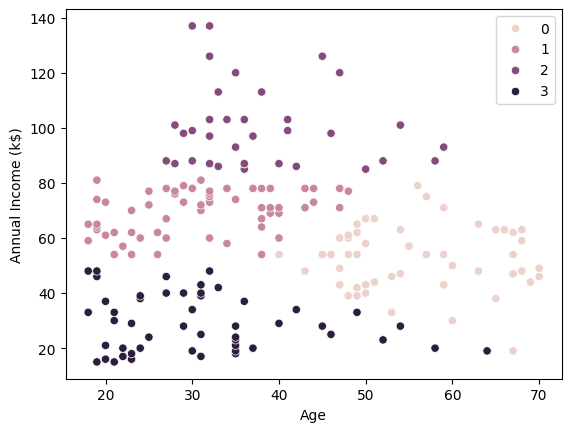

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = point)

# А теперь давайте попробуем решить эту же задачу с помощью библиотеки Sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Конструктор класса принимает параметр n, который показывает количество
кластеров. По умолчанию этот параметр равен 8. Мы зададим значение равное
четырем

In [ ]:
km = KMeans(n_clusters=4)

Теперь запустим алгоритм

In [ ]:
x = df.iloc[:, :2]
km.fit(x)
points = km.predict(x)

Посмотрим на результаты кластеризации на графике.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

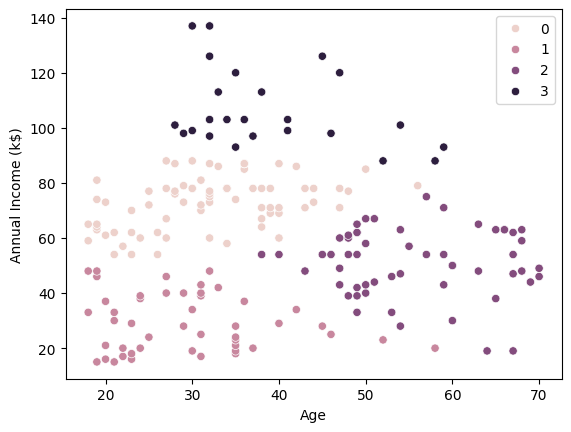

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue=points)

## Метод локтя

Результаты правдоподобные. Мы видим четыре кластера, и точки между кластерами
отнесены к ближайшим. Давайте рассмотрим еще одну ситуацию. Как было сказано
выше, количество кластеров нам изначально не известно. Для сравнения моделей
кластеризации и выбора оптимального количества кластеров часто используют
метод локтя. Его суть в том, чтобы построить несколько моделей, с разным
количеством кластеров, получить какую то метрику качества кластеризации,
построить график зависимости величины метрики от количества кластеров, и найти
точку перелома этого графика. Давайте разберем это процесс.

Для начала построим несколько моделей с разным количеством кластеров,
например от 2 до 6.

In [ ]:
n_clusters = list(range(2, 7))
metrics = []
for k in n_clusters:
  km = KMeans(n_clusters=k).fit(x)
  metrics.append(km.inertia_)
n_clusters

[2, 3, 4, 5, 6]

In [ ]:
metrics

[87121.56591478694,
 62278.886486486495,
 39928.03758463071,
 31662.412142758705,
 28690.377536754808]

Посчитаем метрику качества кластеризации. Часто в качестве метрики используют
величину под названием инерция. Это сумма квадратов расстояний от каждой
точки до ее ближайшей центроиды. Соответственно чем ближе располагается
центроид, тем меньше значение инерции

Построим график зависимости величины инерции от количества кластеров

<Axes: >

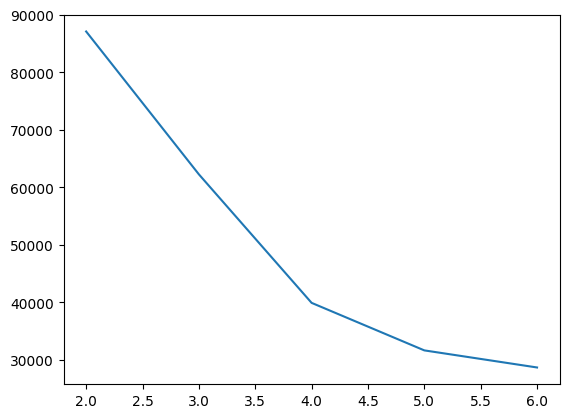

In [ ]:
sns.lineplot(x = n_clusters, y = metrics)

Видиим явную точку перелома, соответствующую четырем кластерам. Получается,
оптимальное количество кластеров равно четыре.

# Кластеризация. DBSCAN.

Мы уже говорили, что для использования метода К - средних необходимо, чтобы
расположение данных в кластерах должно быть близко к нормальному. Что такое
нормальное распределение? Это значит, что кластеры должны быть явными, и быть
сферической формы.

Естественно, в реальных задачах может быть все иначе.

Другими словами, нам нужен метод, который будет работать не только со
сферическими скоплениями точек, но и в принципе с плотным скоплением точек
любой формы. Ну и было бы здорово, чтобы алгоритм самостоятельно определял
количество кластеров. Определять количество кластеров наугад или вручную с
помощью метода локтя здорово, когда кластеров мало. Если ожидаемое количество
кластеров будет стремиться к сотне, определение количества кластеров займет
уйму времени.

А что делать, если кластеры вообще не различимы? Это тоже распространенная
ситуация в реальных данных, когда точки данных не формируют ярко выраженные
и разделяемые кластеры. Часто точки данных формируют почти беспорядочную
структуру, в которой существуют области более высокой и более низкой плотности,
например как на картинке. Также, в этой структуре могут быть выбросы.
Вывод: нам нужен алгоритм, который может работать с областями разной
плотности и учитывает возможные выбросы.
Для преодоления этих ограничений был создан алгоритм DBSCAN (Дибискан). Этот
алгоритм основан на поиске плотных скоплений данных. Разберемся на примере.

Алгоритм перебирает все точки данных и находит такую точку набора данных, что в
ее окрестностях с заранее заданным радиусом находится достаточно много других
точек. Эта точка называется ключевой точкой нового кластера, и ей присваивается
метка кластера. Заданный радиус — гипер параметр, который задается заранее.
“Достаточно много” других точек — это тоже гипер параметр.
24

Таким образом перебираются все остальные точки соседи в окрестностях уже
определенных ключевых точек кластера
Если алгоритм обнаруживает, что текущая точка имеет недостаточно соседей, то
алгоритм такую точку определяет как не ключевую, но при этом она добавляется к
тому же кластеру. Отличие ключевой точки от не ключевой в том, что алгоритм
исследует окрестности именно ключевых точек. Ключевые точки и определяют
скопления точек, а вот не ключевые — скорее всего будут находиться на краях
кластеров.
После того как алгоритм перебрал все найденные ключевые точки, он ищет новую
ключевую точку, и присваивает ей метку нового кластера. И так далее, пока
алгоритм не переберет все точки данных.
Иногда алгоритм будет находить точки, в окрестностях которых не будет вообще ни
одной точки. Тогда эта точка считается выбросом и ей присваивается особая метка.

После этого перебираются все точки, входящие в окрестность ключевой точки.
Если окрестность следующей точки содержит достаточно много других точек
соседей, и одна из них является ключевой точкой, то текущая точка также
становится ключевой.

Давайте попробуем реализовать алгоритм, описанный выше. Посмотрим по другому
на задачу кластеризации.

In [ ]:
df = pd.read_csv('gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# сщздаем экзампляр класса для масштабирования данных
scaler = StandardScaler()

In [ ]:
# сам процесс масштабирования
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Создаем экзампляр класса для модели DBSCAN
# Этот алгоритм должен получить 2 аргумента: блихость одних точек к другим (гиперпараметр eps) и количество соседей, которые находятся рядом с этой точкой (min_samples)
# м от того, сколько точек находятся рядом с нашей точкой и опрдеелеляется, ключевая она или нет.
model = DBSCAN(eps=0.7, min_samples=10) # если 10 точек находятся рядом с той точкой, которую мы сейчас проверяем на расстоянии меньше чем 0.7, тогда мы называем эту точку ключевой
model.fit(df_scaled) # обучение молели

DBSCAN(eps=0.7, min_samples=10)

In [ ]:
# теперь получим метки кластеров для каждого экземпляра данных
df_scaled['labels'] = model.labels_
df_scaled.head() # выведем результаты

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468,-1
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972,-1
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378,-1
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346,0
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436,0


Как видно, в некоторых данных значение равно -1, это обозначает наличие выброса или шума.

Теперь попробуем решить проблему выбросов

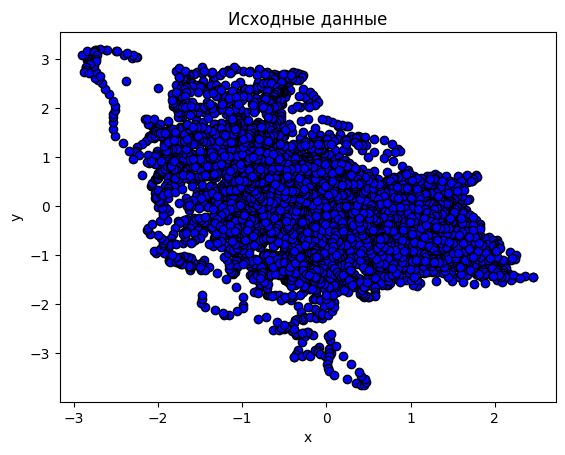

In [ ]:
# заменим -1 на 1
n_clusters = len(set(df_scaled['labels'])) - (1 if -1 in df_scaled['labels'] else 0)

# визуализируем то, что у нас получилось
# plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c = 'blue', marker = 'o', edgecolors= 'black')
plt.scatter(df_scaled.values[:, 0], df_scaled.values[:, 1], c = 'blue', marker = 'o', edgecolors= 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные')
plt.show()

Визуализация аглоритма модели DBSCAN

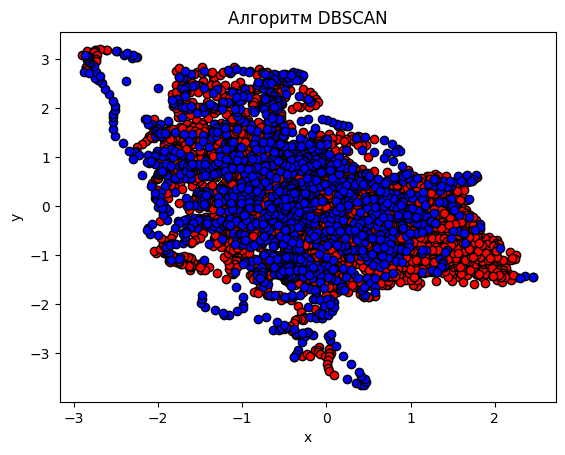

In [ ]:
for cluster_id in range(n_clusters):
  cluster_points = df_scaled[df_scaled['labels'] == cluster_id]
  plt.scatter(cluster_points.values[:, 0], cluster_points.values[:, 1], c = 'red', marker = 'o', edgecolors= 'black')

plt.scatter(df_scaled.values[df_scaled['labels'] == -1][:, 0], df_scaled.values[df_scaled['labels'] == -1][:, 1], c = 'blue', marker = 'o', edgecolors= 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Алгоритм DBSCAN')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(df_scaled, df['labels'])

0.2126020499297606

In [ ]:
df['labels'].value_counts()

,count
labels,
0,5112
-1,1556
3,222
19,176
4,38
15,32
1,28
17,28
6,21
